## Title : ECG Anomaly detection using Autoencoders

### Aim: Use Autoencoder to implement anomaly detection.
Build the model by using:
a. Import required libraries

b. Upload / access the dataset

c. Encoder converts it into latent representation

d. Decoder networks convert it back to the original input

e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [2]:
# a)Upload / access the dataset
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
#df = pd.read_csv("ecg.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 7)

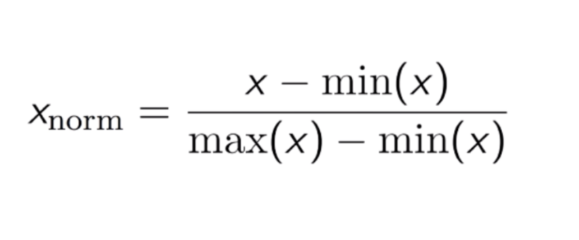

In [8]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)


In [9]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.4100501  0.20445345 0.17933929 ... 0.5339071  0.5807651  0.43156838]
 [0.48124358 0.30453703 0.19312613 ... 0.5739952  0.5965084  0.55041474]
 [0.3658105  0.2832586  0.23787357 ... 0.46731922 0.39469653 0.3760904 ]
 ...
 [0.539326   0.4028425  0.33390504 ... 0.58611435 0.5405901  0.59003866]
 [0.39723524 0.24701662 0.24977723 ... 0.58685064 0.61666715 0.5758559 ]
 [0.37364307 0.24985005 0.1973324  ... 0.51757383 0.53698874 0.43611053]], shape=(2335, 140), dtype=float32)


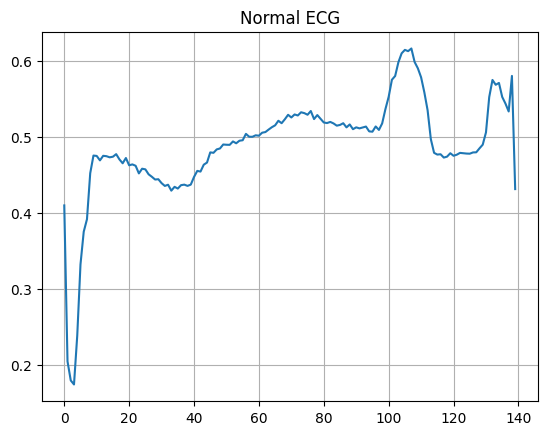

In [10]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

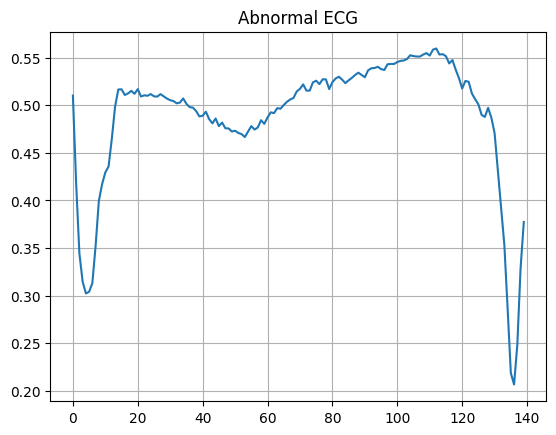

In [11]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

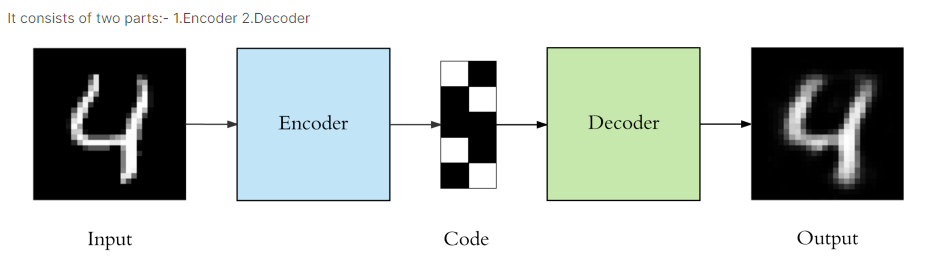

In [12]:
class detector(Model):
    def __init__(self):
        super(detector, self).__init__()
        self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
        self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [13]:
#Let's compile and train the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 4s 135ms/step - loss: 0.0498 - val_loss: 0.0453
Epoch 2/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0447 - val_loss: 0.0436
Epoch 3/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0431 - val_loss: 0.0418
Epoch 4/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0411 - val_loss: 0.0395
Epoch 5/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0388 - val_loss: 0.0372
Epoch 6/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0365 - val_loss: 0.0349
Epoch 7/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0342 - val_loss: 0.0325
Epoch 8/20
5/5 [==============================] - 0s 40ms/step - loss: 0.0318 - val_loss: 0.0302
Epoch 9/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0296 - val_loss: 0.0283
Epoch 10/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0279 - val_loss: 0.0269
Epoch 11/20
5/5 [===========

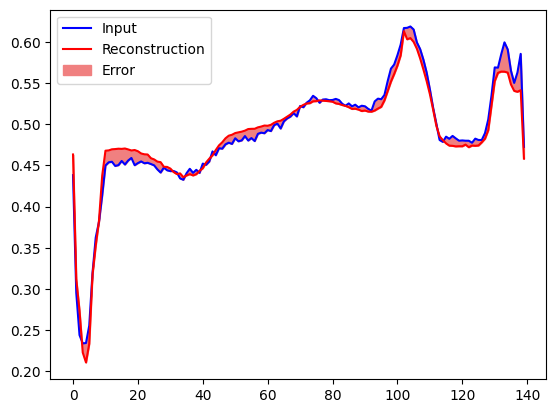

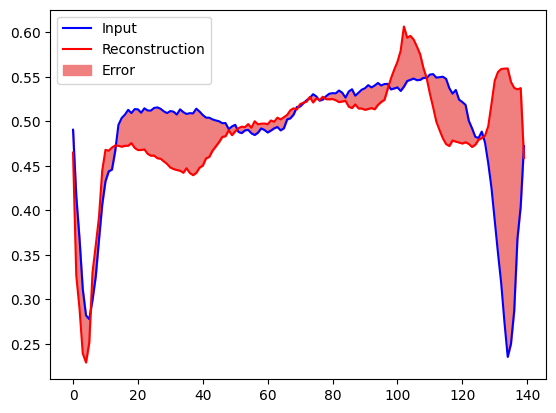

In [14]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
    enc_img = autoencoder.encoder(data)
    dec_img = autoencoder.decoder(enc_img)
    plt.plot(data[n], 'b')
    plt.plot(dec_img[n], 'r')
    plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
    plt.legend(labels=['Input', 'Reconstruction', 'Error'])
    plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

In [17]:
# # evaluate the network
# from sklearn.metrics import classification_report
# import argparse
# print("[INFO] evaluating network...")
# predictions = autoencoder.predict(n_test_data, batch_size=512)
# print(classification_report(n_test_data.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

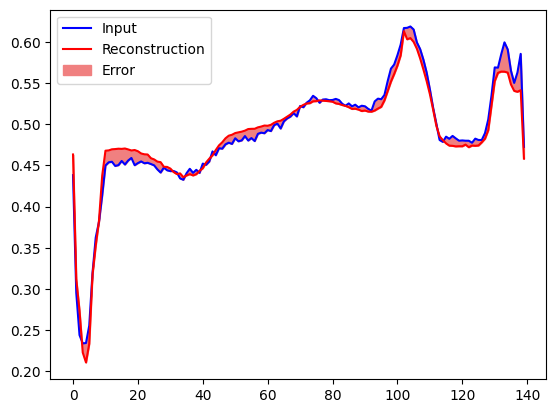

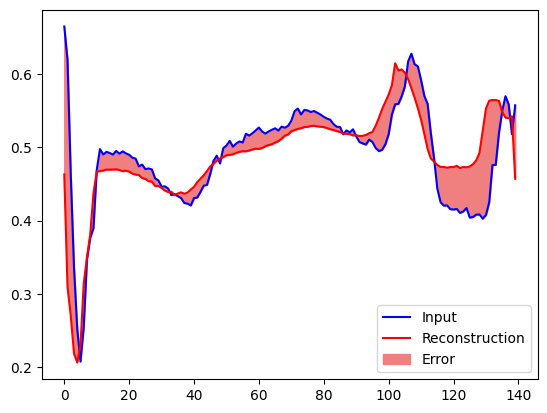

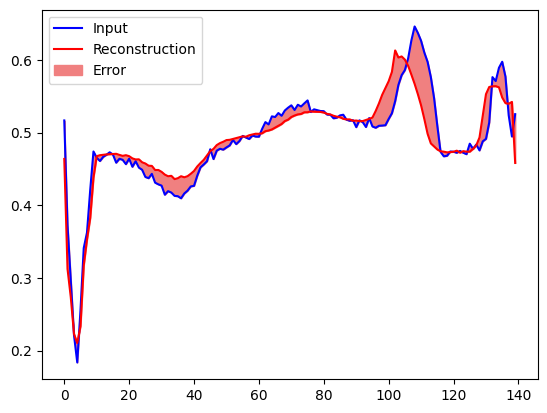

In [15]:
#Lets see some more result visually !!
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)